





# Declarative Programming
En el paradigma declarativo se enfoca mas en el "que" y no en el "como". Recuerde el ejemplo del taxista. Le dice lleveme de A hasta B, pero no le da detalles. En el imperativo lo dirige cuadra por cuadra.

Hay dos tipos importantes de lenguajes declarativos.

* logic paradigm (paradigma logico)
* functional paradigm (paradigma funcional).

## Paradigma logico.
Lo explico con ejemplo, basasdo en ProLog: Programming in Logic.
El ejemplo que vamos a ver (es comun en la red) es el de la suma de elementos en una lista.


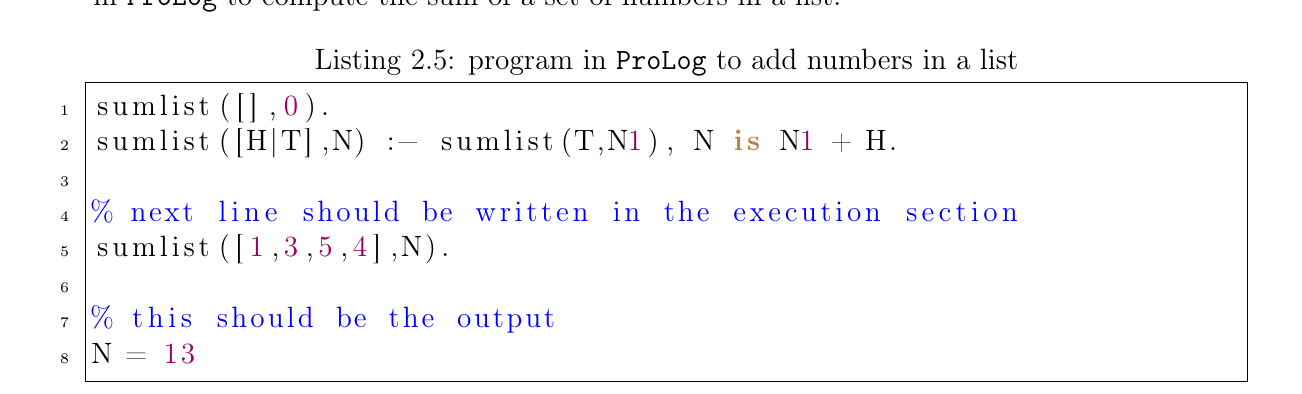

* Inicialmente, para una lista vacia la instrucion 1 corre. Pero como la lista no es vacia este paso no corre.

* Vamos a la instruccion 2. Dividimos la lista en cabeza y cola. $H=1$, $T=[3,5,4]$.  El resultado $N$ se calcula de $N1$ y $H$ pero $N1$ todavia no se sabe. $ N = N1 + H = N1 + 1$.

$$ N = N1 + 1 \tag{1} .$$
El problema es recursivo

* Corremos el programa sobre la lista que ahora es la cola $T=[3,5,4]$. De esta cola la cabeza ahora es $H=3$ y la nueva cola $T=[5,4]$. Ahora entonces $N=N1 +H$, entonces

$$ N = N1 + 3 \tag{2}. $$

* Seguimos en la recursion. La lista es ahora $[5,4]$. De aca la cabeza es $H=5$ y la cola es $T=[4]$. Como $N=N1 + H$, entonces

$$ N = N1 + 5 \tag{3}. $$

* Siguiendo con la recursion, la lista es $[4]$, de aca la cabeza es $H=4$, y la cola es $T=[]$.  entonces como $H=N1 +H$,

$$ N = N1 + 4  \tag{4}.$$.

Todavia no sabemos que es $N1$.

* como la lista es vacia, entonces se corre la linea 1, donde $N1=0$.

Tenemos que hacer "backpropagation".

* De la ecuacion (4),
$$ N = 0 + 4 $$.
y $N1 = 4$.
* De la ecuacion (3)
$$ N = N1 + 5 = 4 + 5 = 9.$$
$N1 = 9$.
* De la ecuacion (2)
$$ N = N1 + 3  = 9 + 3 = 12.$$.

y finalmente de la ecuacion (1)

$$ N = N1 + 1 = 12 +1 + 13 .$$



## Paradigma Funcional (FP).

Este paradigma lo podemos definir con propiedades que debe cumplir. Cosas deseables:

* el FP es bueno para programacion en paralelo.
* FP es bueno para analizar datos extensos
* FP es facil para debugging (depuramiento)
* FP es facil de probar.

El FP se basa en funciones que devuelven un mismo valor para los mismos argumentos. En este sentido si se puede hacer un **look-up table**, Si el numero posible de "outcomes" es finito y no muy grande, el look-up table es una opcion muy buena.

Hagamos una lista de las propiedades que cumple el FP.
A las funciones en FP se les llama **first class citizens**.
Y estan cumplen ciertos requisitos.

* Funciones Puras (Pure Functions): Siempre devuelven el mismo valor para los mismos parametros. Que funciones se salen de aca? aquellas que retornen, por ejemplo, valores aleatorios, o valores que dependan del tiempo. Muestro un ejemplo de esto abajo.

* No tienen efectos colaterales (no side effects): Las funciones no pueden modificar el valor de las variables que usan. Las variables de alcance global no se cambian. Esto es bueno y es malo, explico mas adelante por que.

* Recursion: Un programa en lenguaje funcional no tiene "while", el "for" sino que estos se simulan mediante recursiones. Vamos a ver ejemplos.

Lenguajes compatibles con el FP: Haskell esta dedicado exclusivamente a la programacion funcional.  El python puede ser usado para FP, pero tambien para muchos otros paradigmas. Entonces python es **multiparadigma**.

### Ventajas del FP:
* Es facil analizar y es mas robusto, menos facil de cometer errores.
* El rendimiento es mayor.
* Facil de paralelizar. No hay muchos problemas de concurrencia.
* el FP es mas amigable en el sentido que es mas facil de identificar las salidas y entradas y los programas son mas leibles.

### Desventajas del FP:
* Como una variable debe ser estatica (no cambia con el tiempo), se crean muchas copias de cosas parecidas llenando la memoria. Por ejemplo. Si tu variable es una lista de un millon de entradas y agregas una mas, la estas modificando y esto es prohibido en FP, entonces debes crear otra. Y las dos son practicamente identicas.

* Las recursiones profundas son costosas. Crean un "stack" muy grande.

Hay formas de mitigar estos problemas pero yo no las se.


Volviendo a lo de ciudadano de primera clase:

1. Una funcion puede ser asignada a una variable
2. Una funcion puede ser pasada como argumento a otra. Composicion de funciones
3. Una funcion puede ser retornada de otra.

Veamos ejemplos.


In [ ]:
# funcion asignada a una variable
import numpy as np

def mySin(x):
    return np.sin(x)


# asignamos la funcion a una variable s
s = mySin  # un alias

print("seno de 30 grados es", s(np.pi/6))
print("seno de 0 grados es", s(0))


seno de 30 grados es 0.49999999999999994
seno de 0 grados es 0.0


In [ ]:
# composicion de funciones. Una funcion se pasa como argumento a otra

def myMap(f, myList):
    result = []
    for i in myList:
        result.append(f(i))

    return result

myList = [0, np.pi/6, np.pi/4, np.pi/2, np.pi]

# composicion
myMap(s, myList) # applico la funcion seno a cada miembro de la lista

[0.0, 0.49999999999999994, 0.7071067811865475, 1.0, 1.2246467991473532e-16]

In [ ]:
myMap(np.cos, myList)

[1.0, 0.8660254037844387, 0.7071067811865476, 6.123233995736766e-17, -1.0]

In [ ]:
def sqr(x):
    return x**2

myMap(sqr, myList)

[0,
 0.2741556778080377,
 0.6168502750680849,
 2.4674011002723395,
 9.869604401089358]

In [ ]:
# como una funcion retorna otra
def myDriver(msg):

    def myMsg():
        print("my message is", msg)

    return myMsg

In [ ]:
a = myDriver("hello")
a()


my message is hello


## Comparacion entre paradigmas de programacion

### Procedural (Imperative, structured)
Observe el estado de la variable "a" en el siguiente programa. "a" es mutable.

In [ ]:
def addone(x):
    return x+1


def addonethreetimes(x):
    x = addone(x)
    print(f"x={x}");  # print("x=%f", x)
    x = addone(x)
    print(f"x={x}");  # print("x=%f", x)
    x = addone(x)
    print(f"x={x}");  # print("x=%f", x)

    return x

# variable para la prueba
a = 5
print(f"a antes de la mutacion {a}")
a = addonethreetimes(a)
print("a luego de la mutacion", a)


a antes de la mutacion 5
x=6
x=7
x=8
a luego de la mutacion 8


In [ ]:
# el programa anterior es prohibido en FP.
# lo que hacemos es:
def addonethreetimes(a):
    b = addone(a)
    print(f"b={b}")
    b = addone(a)
    print(f"b={b}");
    b = addone(a)
    print(f"b={b}");

    return a

a=5
a= addonethreetimes(a)
print("a returned is", a)

b=6
b=6
b=6
a returned is 5


###  Como simulamos un ```for``` loop con recursion.
El caso no funcional (for) versus el funcional (recursivo)

In [ ]:
import time

def foo(n):
    for i in range(n):
        pass # dummy
    return

N=5000

def timefoo(N):
    start = time.time()
    f = foo(N)
    end = time.time()
    return end-start

scale=10**6

t = scale*timefoo(N)
print(f" el tiempo escalado para la funcion foo(N) es {t}")

 el tiempo escalado para la funcion foo(N) es 239.37225341796875


In [ ]:
t = scale*timefoo(N)
print(f" el tiempo escalado para la funcion foo(N) es {t}")

 el tiempo escalado para la funcion foo(N) es 149.72686767578125


La funcion ```timefoo()``` no es candidata para el funcional programming por que esta retornando valores diferentes para para argumentos iguales.

In [ ]:
# aca nos encargamos de la suma de dos formas, con for, o recursiva
# el mismo programa que mostramos arriba en ProLog

# la forma simple (clasica)
def sum(l): # l es una lista
    s = 0
    for i in range(len(l)):
        s += l[i]

    return s


print(sum([1,3,5,4]))

13


In [ ]:
# el mismo problema recursivo.

def sumrecursive(l):
    if len(l) == 0:
        return 0
    else:
        if len(l) == 1:
            return l[0]
        else:
            return l[len(l) -1] + sumrecursive(l[:-1])

print(sumrecursive([1,3,5,4]))

13


In [ ]:
l=[]
sumrecursive(l)

0

In [ ]:
l=[5]
sumrecursive(l)

5

In [ ]:
l = np.arange(1000000)
len(l)

1000000

In [ ]:
l[0]

0

In [ ]:
sumrecursive(l)

RecursionError: ignored

In [ ]:
l = np.arange(500)

def timerec(l):
    start = time.time()
    f = sumrecursive(l)
    end = time.time()
    return end-start

timerec(l)

0.0009157657623291016

In [ ]:
def timerec(l):
    start = time.time()
    f = sum(l)
    end = time.time()
    return end-start

In [ ]:
timerec(l)

0.00014734268188476562

## Proxima Clase: Object Oriented Theory.